In [ ]:
# import pandas as pd
import numpy as np 
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

In [ ]:
# keras fashion mnist 데이터 제공
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# data 분리
# from sklearn.model_selection import train_test_split

In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

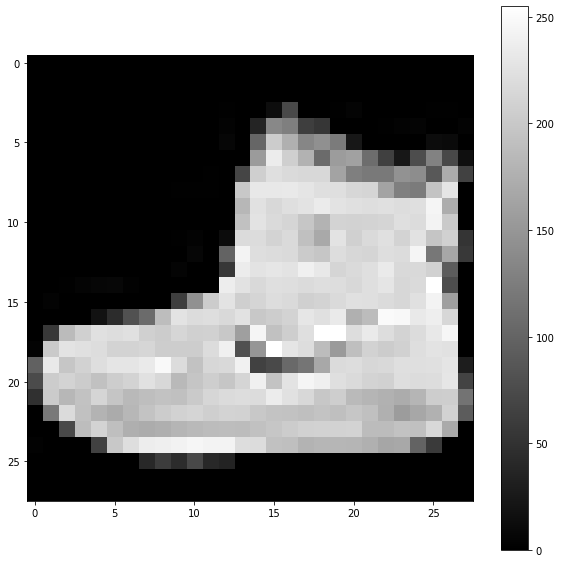

In [ ]:
# 시각화
plt.figure(figsize=(10,10))
plt.imshow(train_images[0], "gray") # 흑백 이미지 -> gray
plt.colorbar()
plt.show()

In [ ]:
# 이미지 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# label이 몇개가 있을까요?
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

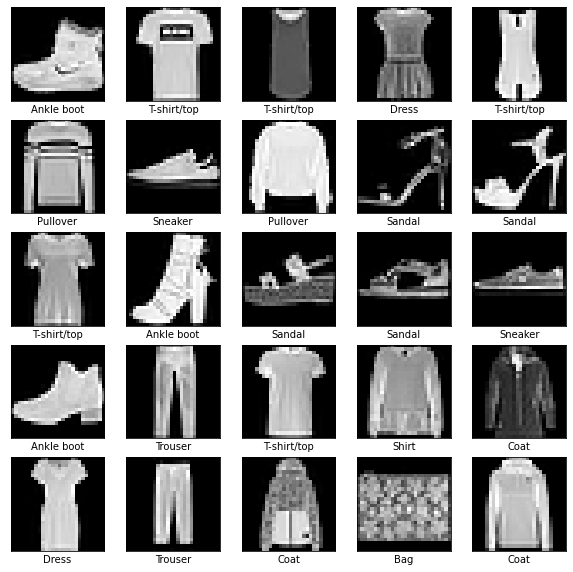

In [ ]:
# 다른 데이터도 살펴보기
plt.figure(figsize=(10,10))
for i in range(25): # range (0, 25) 0 부터 24까지 수가 들어있음
    plt.subplot(5,5, i+1) # plt의 인덱스는 1부터 시작, python 인덱스는 0부터 시작
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], "gray")
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# (데이터수, 가로, 세로, 채널) 
# - Tensorflow Framework
# - Pytorch Framework -> 채널, 가로, 세로

In [ ]:
train_images = train_images[:,:,:, np.newaxis]
test_images = test_images[:,:,:, np.newaxis]

In [ ]:
list_1 = [1,2,3,4]

In [ ]:
list_1[:]

[1, 2, 3, 4]

In [ ]:
train_images[0].shape

(28, 28, 1)

In [ ]:
# model
model = keras.Sequential([
        # CNN 레이어
        keras.layers.Conv2D(32, 3, kernel_initializer="he_normal", input_shape=(28,28,1), activation="relu"),
        keras.layers.MaxPooling2D(),
        keras.layers.Conv2D(64, 3, kernel_initializer="he_normal", activation="relu"),
        keras.layers.MaxPooling2D(),
        keras.layers.Flatten(), # 일자로 펴짐
        # FCL
        keras.layers.Dense(128, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# sparse_categorical_crossentropy -> label encoding
# categorical_crossentropy -> one-hot

In [ ]:
# label값 one-hot 
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [ ]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [ ]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"]
)

In [ ]:
EPOCH = 1000
BATCH_SIZE = 256
es = keras.callbacks.EarlyStopping(patience=5) 

In [ ]:
model.fit(train_images, train_labels, epochs=EPOCH, batch_size=BATCH_SIZE, validation_split=0.2 ,callbacks=[es])

Epoch 1/1000
188/188 [==============================] - 3s 16ms/step - loss: 0.2404 - accuracy: 0.9127 - val_loss: 0.2492 - val_accuracy: 0.9082
Epoch 2/1000
188/188 [==============================] - 3s 13ms/step - loss: 0.2272 - accuracy: 0.9159 - val_loss: 0.2383 - val_accuracy: 0.9134
Epoch 3/1000
188/188 [==============================] - 3s 13ms/step - loss: 0.2131 - accuracy: 0.9210 - val_loss: 0.2373 - val_accuracy: 0.9124
Epoch 4/1000
188/188 [==============================] - 3s 14ms/step - loss: 0.1979 - accuracy: 0.9275 - val_loss: 0.2456 - val_accuracy: 0.9097
Epoch 5/1000
188/188 [==============================] - 3s 14ms/step - loss: 0.1878 - accuracy: 0.9298 - val_loss: 0.2239 - val_accuracy: 0.9153
Epoch 6/1000
188/188 [==============================] - 3s 14ms/step - loss: 0.1784 - accuracy: 0.9333 - val_loss: 0.2459 - val_accuracy: 0.9100
Epoch 7/1000
188/188 [==============================] - 3s 14ms/step - loss: 0.1669 - accuracy: 0.9378 - val_loss: 0.2333 - val_ac

In [ ]:
# test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print()
print(f"테스트 정확도 : {test_acc}")

313/313 - 1s - loss: 0.2979 - accuracy: 0.9029

테스트 정확도 : 0.902899980545044


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

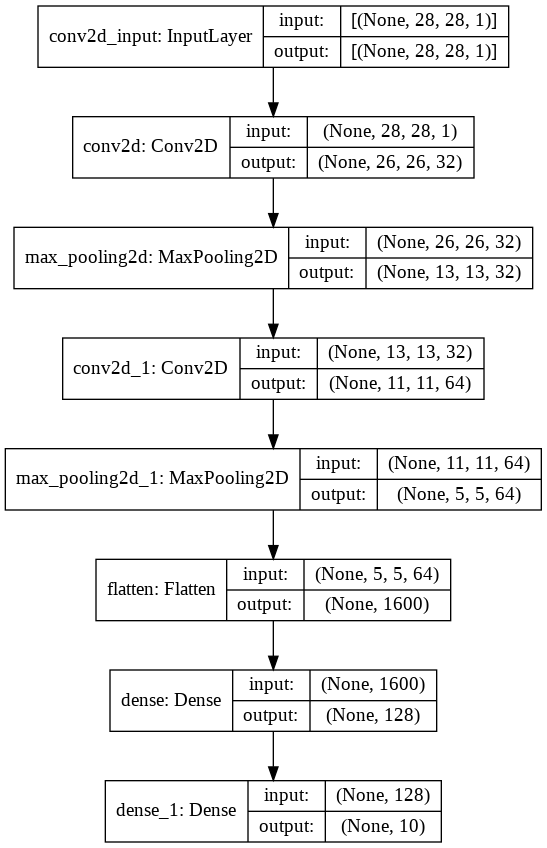

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# 예측
predictions = model.predict(test_images)

In [ ]:
# 시각화 함수
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

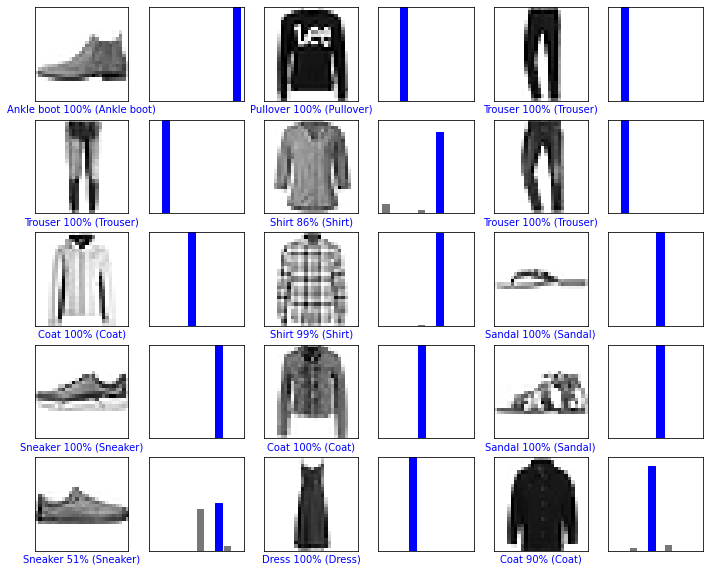

In [ ]:
# 시각화
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, np.squeeze(test_images))
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()